In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('gutenberg')

from nltk.corpus import gutenberg

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [3]:
docs = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]

In [5]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []
    
    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
                   for token in tokenized 
                   if not token.lower() in stopwords.words('english') 
                   if token.isalpha()]

        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
        
    return preprocessed

preprocessed = preprocess(docs)

In [13]:
len(set(preprocessed[0].split(" ")))

4119

In [14]:
len(set(docs[0].split(" ")))

26182

In [35]:
vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(preprocessed)

len(vectorizer.get_feature_names())

24366

In [36]:
vectorized_df = pd.DataFrame(vectorized.toarray(), columns=vectorizer.get_feature_names())
vectorized_df.head()

,aaron,aaronit,ab,aback,abaddon,abaft,abagtha,abana,abandon,abarim,abas,abash,abassin,abat,abba,abbana,abbey,abbeyland,abbot,abbrevi,abda,abdeel,abdi,abdic,abdiel,abdomen,abdon,abe,abeam,abednego,abel,abelard,abelbethmaachah,abelmaim,abelmeholah,abelmizraim,abelshittim,aberr,abey,abez,...,ziza,zizah,zmite,zoan,zoar,zoba,zobah,zobebah,zodiac,zodiack,zoetrop,zogranda,zohar,zoheleth,zoheth,zola,zone,zoo,zook,zoolog,zophah,zophai,zophar,zophiel,zophim,zorah,zorathit,zoreah,zorit,zoroast,zorobabel,zso,zuar,zumpt,zuph,zur,zuriel,zurishaddai,zuyder,zuzim
0,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.011735,0.000000,0.000621,0.000000,0.0000,0.0000,0.000544,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
1,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000964,0.0000,0.0000,0.000000,0.001072,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
2,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00044,0.000000,0.00000,0.0,0.0,0.000542,0.000000,0.0,0.000000,0.000819,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
3,0.030433,0.0002,0.0,0.0,0.0001,0.0,0.0001,0.0001,0.00000,0.000351,0.00071,0.0,0.0,0.000398,0.000301,0.0,0.000000,0.000000,0.000000,0.000000,0.0002,0.0001,0.000263,0.000000,0.000088,0.0,0.000802,0.0,0.0,0.001316,0.001403,0.0,0.0002,0.0001,0.000301,0.0001,0.0001,0.0,0.0,0.0001,...,0.0002,0.0001,0.0,0.000701,0.001002,0.0002,0.001102,0.0001,0.0,0.0,0.0,0.0,0.000401,0.0001,0.0001,0.0,0.0,0.0,0.0,0.0,0.0002,0.0001,0.000401,0.0,0.0001,0.000802,0.0001,0.0001,0.0001,0.0,0.000301,0.0,0.000501,0.0,0.000301,0.000501,0.0001,0.000501,0.0,0.0001
4,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000


In [37]:
book_num_chars = [len(doc) for doc in docs]
vectorized_df['book_chars'] = book_num_chars
vectorized_df.head()

,aaron,aaronit,ab,aback,abaddon,abaft,abagtha,abana,abandon,abarim,abas,abash,abassin,abat,abba,abbana,abbey,abbeyland,abbot,abbrevi,abda,abdeel,abdi,abdic,abdiel,abdomen,abdon,abe,abeam,abednego,abel,abelard,abelbethmaachah,abelmaim,abelmeholah,abelmizraim,abelshittim,aberr,abey,abez,...,zizah,zmite,zoan,zoar,zoba,zobah,zobebah,zodiac,zodiack,zoetrop,zogranda,zohar,zoheleth,zoheth,zola,zone,zoo,zook,zoolog,zophah,zophai,zophar,zophiel,zophim,zorah,zorathit,zoreah,zorit,zoroast,zorobabel,zso,zuar,zumpt,zuph,zur,zuriel,zurishaddai,zuyder,zuzim,book_chars
0,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.011735,0.000000,0.000621,0.000000,0.0000,0.0000,0.000544,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000,887071
1,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000964,0.0000,0.0000,0.000000,0.001072,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000,466292
2,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00044,0.000000,0.00000,0.0,0.0,0.000542,0.000000,0.0,0.000000,0.000819,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000,673022
3,0.030433,0.0002,0.0,0.0,0.0001,0.0,0.0001,0.0001,0.00000,0.000351,0.00071,0.0,0.0,0.000398,0.000301,0.0,0.000000,0.000000,0.000000,0.000000,0.0002,0.0001,0.000263,0.000000,0.000088,0.0,0.000802,0.0,0.0,0.001316,0.001403,0.0,0.0002,0.0001,0.000301,0.0001,0.0001,0.0,0.0,0.0001,...,0.0001,0.0,0.000701,0.001002,0.0002,0.001102,0.0001,0.0,0.0,0.0,0.0,0.000401,0.0001,0.0001,0.0,0.0,0.0,0.0,0.0,0.0002,0.0001,0.000401,0.0,0.0001,0.000802,0.0001,0.0001,0.0001,0.0,0.000301,0.0,0.000501,0.0,0.000301,0.000501,0.0001,0.000501,0.0,0.0001,4332554
4,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000,38153


In [38]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
clusters = model.fit_predict(vectorized)

In [39]:
df = pd.DataFrame({"title": gutenberg.fileids(), "cluster": clusters})
df

,title,cluster
0,austen-emma.txt,2
1,austen-persuasion.txt,2
2,austen-sense.txt,2
3,bible-kjv.txt,1
4,blake-poems.txt,1
5,bryant-stories.txt,2
6,burgess-busterbrown.txt,0
7,carroll-alice.txt,2
8,chesterton-ball.txt,2
9,chesterton-brown.txt,2


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7da684828>,
                 k=None, metric=None, model=None, timings=True)

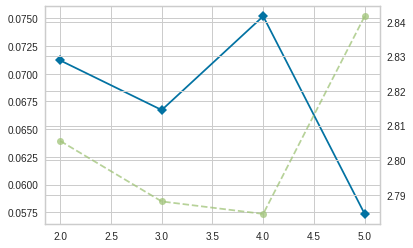

In [40]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette')

visualizer.fit(vectorized)

In [42]:
model_2 = AgglomerativeClustering()
clusters_2 = model_2.fit_predict(vectorized.toarray())

In [44]:
pd.DataFrame({"title": gutenberg.fileids(), "cluster": clusters_2})

,title,cluster
0,austen-emma.txt,1
1,austen-persuasion.txt,1
2,austen-sense.txt,1
3,bible-kjv.txt,0
4,blake-poems.txt,0
5,bryant-stories.txt,1
6,burgess-busterbrown.txt,1
7,carroll-alice.txt,1
8,chesterton-ball.txt,1
9,chesterton-brown.txt,1


In [46]:
from sklearn.decomposition import NMF

num_keywords = 10
num_topics = 4

vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) 
            for i in topic.argsort()[:-num_keywords - 1:-1]] 
           for topic in model.components_]

topics = [[x[0] for x in i] for i in results]
topics

[['said',
  'littl',
  'one',
  'syme',
  'alic',
  'like',
  'look',
  'turnbul',
  'man',
  'could'],
 ['thee',
  'thou',
  'thi',
  'shall',
  'unto',
  'heaven',
  'god',
  'love',
  'day',
  'one'],
 ['haue',
  'macb',
  'ham',
  'bru',
  'vpon',
  'brutus',
  'thou',
  'lord',
  'caesar',
  'heer'],
 ['elinor',
  'could',
  'emma',
  'would',
  'mariann',
  'mr',
  'elliot',
  'ann',
  'harriet',
  'miss']]

In [52]:
my_list = [1, 2, 3, 4, 5]

my_list[:-1]

[1, 2, 3, 4]

In [ ]:
vectorizer.get_feature_names()